In [70]:
from astropy.io import fits
from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
from photutils import CircularAperture
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import aperture_photometry
import numpy as np
from scipy.optimize import leastsq
import pylab as pylab
from matplotlib.mlab import find
from scipy.optimize import fsolve
from scipy import interpolate
import scipy.signal as signal
from astroquery.simbad import Simbad
from astropy import coordinates
from astropy import units as u
from astropy import wcs
from astropy import coordinates
import astropy.units as u
from astroquery.simbad import Simbad
from operator import truediv
from operator import add
from gatspy.periodic import LombScargleFast

Image = dict()
for x in range(0, 398):
    Image[x] = 'RealSim'+str(x)+'.fits'

t = Image
missing_mag = 0

LS = 100000

In [71]:
import os
os.chdir('/home/mj1e16/Downloads/phosim-phosim_release-39f267c3f973/output/RealStarSim/')

In [72]:
AM0 = 21
AM1 = 21.4
AM2 = 22 #(and variable)
AM3 = 21 #(and variable)
AM4 = 22.5

#AM5 = 22
#AM6 = 21.4293038974
#AM7 = 22.0245103541
#AM8 = 20.8
#AM9 = 19.5
#AM10 = 18.9
#AM11 = 22.7
#AM12 = 19.7810394797





L = [AM0, AM1, AM2, AM3, AM4]# AM5, AM6, AM7, AM8, AM9, AM10, AM11, AM12]

In [73]:
FWHM = 5.0
MinSep = 0.8 #sets value for discriminating sources
N = 20 #number of images minus 1 as it starts from zero
imno = 0
imagedata = dict()
sources = dict()
Date = dict()
STD = dict()
Median = dict()

for imno in range(0, N):
    hdu_list = fits.open(t[imno])
    imagedata[imno] = hdu_list[0].data
    mean, median, std = sigma_clipped_stats(imagedata[imno], sigma=3.0, iters=5) 
    Median[imno] = median
    STD[imno] = std
    daofind = DAOStarFinder(fwhm=FWHM, threshold=5.*std)
    sources[imno] = daofind(imagedata[imno] - median)
    Date[imno] = hdu_list[0].header['MJD-OBS']
    
    #print(Date[imno])
    #print(sources[imno]) 
    #print(std)


In [74]:
print(Date[0])

49553.7024838


In [75]:
#print(STD)
num = 0

T = [0] * 2
for num in range(0, 2):
    for x in range(0, 12):
        if x==1 or x==0:# or x==: #or x==9 or x==11:
            g = L[x] - sources[num][x][10]
            #print(g)
            T[num] = T[num] + g
        K = [z/2 for z in T]
    #print(K)
#print(T)
#print(T[13])
C2 = np.mean(T)
C = np.mean(K)
print(C)
print(C2/2)
print(K)

23.1017230069
23.1017230069
[23.101723006916835, 23.101723006916835]


In [76]:
TB = dict()
x1 = 2
x2 = 5
TM = [0]*2
apertures = dict()
positions = dict()
for x in range(0, 2):
    if x==1:# or x==0:
        positions[x] = [(sources[0][x][1], sources[0][x][2])] #swap to sources 0? 
        apertures[x] = CircularAperture(positions[x], r = FWHM)
        dataone = imagedata[0]
        mean, median, std = sigma_clipped_stats(dataone, sigma=3.0, iters=5)
        phot_table = aperture_photometry(dataone - median, apertures[x])
        TB[x] = -2.5*(np.log10(phot_table[0][3]/15))
        TM[x] = L[x] - TB[x]
APK = (sum(TM))
print(TM)
print(APK) #mag correction for aperture photometry measurements
APD = APK - C
print(APD)
print(C)
#print(K1)

[0, 26.157519736139339]
26.1575197361
3.05579672922
23.1017230069


0.0301809946471
('Object', 0)
('variable object', 1)


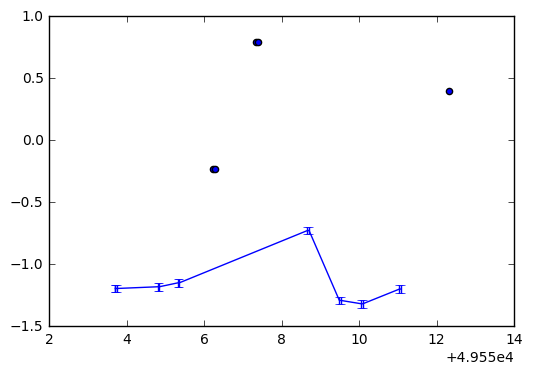

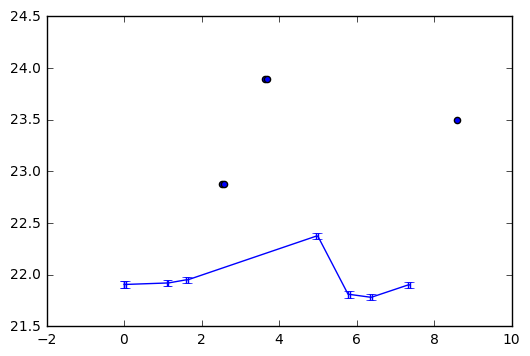

[ 0.00328359 -0.07505199]
   MAIN_ID          RA          DEC      ... COO_WAVELENGTH     COO_BIBCODE    
                 "h:m:s"      "d:m:s"    ...                                   
-------------- ------------ ------------ ... -------------- -------------------
TYC 5253-332-1 23 59 59.770 -00 03 55.20 ...              O 2000A&A...355L..27H
 MCG+00-01-014 00 00 04.425 -00 04 59.96 ...              I 2006AJ....131.1163S
  LEDA 1152096   00 00 01.6    -00 05 34 ...              O 2003A&A...412...45P
[ 0.6904161]
('Object', 1)
0.0178002673406
('Object', 2)
('variable object', 3)


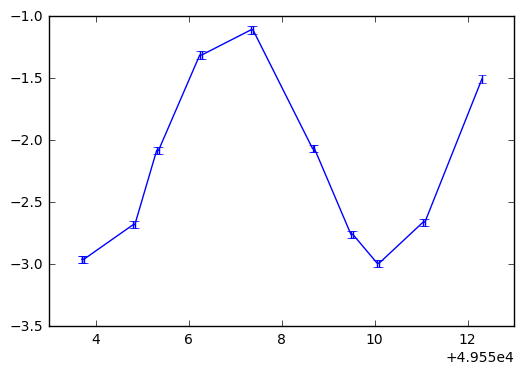

[ 0.00164482 -0.08354197]
   MAIN_ID          RA          DEC      ... COO_WAVELENGTH     COO_BIBCODE    
                 "h:m:s"      "d:m:s"    ...                                   
-------------- ------------ ------------ ... -------------- -------------------
  LEDA 1152096   00 00 01.6    -00 05 34 ...              O 2003A&A...412...45P
 MCG+00-01-014 00 00 04.425 -00 04 59.96 ...              I 2006AJ....131.1163S
TYC 5253-332-1 23 59 59.770 -00 03 55.20 ...              O 2000A&A...355L..27H
0.665234951378
('Object', 3)


In [80]:
n = 0 # not obsolete!
x = 0 #cycles through possible objects starting at zero
Q =[0] #used to define corresponding objects
num = 0 #used for sources[]
MissingDate = [0]
MissingMag = [0]
#Q = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#Q = [a, b, c, d, e, f, g, h, i, j, k, l, m] #sets itteration letter
H = 0
y = (sources[num][-1][0]-1)
ystart = (sources[0][-1][0])
#k = 0
#av = dict()
#tot = dict()
#Detect = dict()
#mag = dict()
#finalstd = dict()
#totstd = dict()
av = [0] * ystart
tot = [0] * ystart
Detect = [0] * ystart
#mag = [0] * N
STD = [0] * N
totstd = [0] * ystart
finalstd = [0] * ystart
#error = [0]
N = 20
for x in range(0, ystart):
    #HBO = 0    
    for num in range(0, N):#itterates over all images loaded
        y = (sources[num][-1][0])#-1) #appened y through the looop
        #K1 = AM1 - sources[num][0][10]
        for Q[n] in range(0, y): #change values of object depending
            #y = (sources[num][-1][0]-1)
            if (((sources[0][x][2] - sources[num][Q[n]][2])**2) + ((sources[0][x][1] - sources[num][Q[n]][1])**2)) < (0.3**2): #if its the same then stop
                #print(Q[n], num, x, y)
                tot[x] = tot[x] + (sources[num][Q[n]][10]) #calculate mag total
                Detect[x] = Detect[x] + 1 #number of detections
                #mag[num] = sources[num][Q[n]][10]
                #print(Detect[x], num)
                if num == 0:
                    DateObs = [Date[0]] #sets date for each new object and begging of sequence
                    DATE = [Date[0]]
                    #print(DateObs)
                    mag = [sources[num][Q[n]][10]] #sets mag like above
                    error = [1/((sources[num][Q[n]][8] + Median[num])**0.5)]
                    ERROR = [1/((sources[num][Q[n]][8] + Median[num])**0.5)]
                    MAG = [sources[num][Q[n]][10]]
                else:
                    DateObs.extend([Date[num]])
                    DATE.extend([Date[num]])# appends date of observation and takes into account when the object isnt detected
                    mag.extend([sources[num][Q[n]][10]]) #appends mag
                    error.extend([1/((sources[num][Q[n]][8] + Median[num])**0.5)])
                    ERROR.extend([1/((sources[num][Q[n]][8] + Median[num])**0.5)])
                    MAG.extend([sources[num][Q[n]][10]])
                break
            else:
                if Q[n] == (y-1) and x != y:
                 
                    positions = [(sources[0][x][1], sources[0][x][2])]
                    apertures = CircularAperture(positions, r = FWHM)
                    data = imagedata[num]
                    mean, median, std = sigma_clipped_stats(data, sigma=3.0, iters=5)
                  
                    phot_table = aperture_photometry(imagedata[num] - median, apertures)#, error=error)
                    
                    missing_mag = -2.5*(np.log10((phot_table[0][3])/15))
                    actual_mag = missing_mag + APD  
                   
                    MAG.extend([actual_mag])
                    DATE.extend([Date[num]])
                    ERROR.extend([1/((phot_table[0][3] + median)**0.5)])
                    tot[x] = tot[x] + [actual_mag]
                    Detect[x] = Detect[x] + 1
                    if sum(MissingMag) == 0: 
                        MissingDate = ([Date[num]])
                        MissingError = [1/((phot_table[0][3] + median)**0.5)]
                        MissingMag = [actual_mag]
                        
                    else:
                        MissingError.extend([1/((phot_table[0][3] + median)**0.5)])
                        MissingMag.extend([actual_mag])

                        if sum(MissingDate) == 0:
                            MissingDate = ([Date[num]])
                        
                        else:
                            MissingDate.extend([Date[num]])
                        
                
    av[x] = tot[x]/Detect[x]
    STD = [((z - av[x])**2) for z in MAG]
    totstd[x] = sum(STD)
    finalstd[x] = (totstd[x]/Detect[x])**0.5
    if finalstd[x] > 0.5:
        print('variable object', x)
        plt.errorbar(DateObs, mag, yerr=error)
        if sum(MissingDate) != 0 and sum(MissingMag) != 0:
            plt.scatter(MissingDate, MissingMag)
        plt.show()
        
        #plt.scatter(DateObs, mag)
        #plt.show()
        X = [k - DateObs[0] for k in DateObs]
        #mean = np.mean(mag)
        Y = [w + C for w in mag]
        M = [z + C for z in MissingMag]
        MD = [k - DateObs[0] for k in MissingDate]
        plt.errorbar(X, Y, yerr=error)
        if sum(MissingDate) != 0 and sum(MissingMag) != 0:  
            plt.scatter(MD, M)
        plt.show()
        
        XX = [k - DateObs[0] for k in DATE]
        YY = [w + C for w in MAG] 
        
        model = LombScargleFast().fit(XX, YY, ERROR)
        periods, power = model.periodogram_auto(nyquist_factor=100)
        fig, ax = plt.subplots()
        ax.plot(periods, power)
        ax.set(xlim=(1, 15), ylim=(0, 1.2),
               xlabel='period (days)',
               ylabel='Lomb-Scargle Power');
        plt.show()
        
        hdulist = fits.open(t[num]) #opens image to find sky coords
        w = wcs.WCS(hdulist[0].header) # read the first in list?
        pixcrd = np.array([[float(sources[0][0][1]), float(sources[0][0][2])], [float(sources[0][1][1]), float(sources[0][1][2])], [float(sources[0][x][1]), float(sources[0][x][2])]], np.float_)#define coordinate to find system pixcrd = np.array([float(sources[num][Q[n]][1]), float(sources[num][Q[n]][2])])#, np.float_)# only because theres no BS0, remeber to change otherwise
        world = w.wcs_pix2world(pixcrd, 0)#makes array
        print(world[2])#prints value of variable star found
        result_table = Simbad.query_region(coordinates.SkyCoord( world[2][0], world[2][1], unit=(u.deg, u.deg)),  
                                                                 radius=0.02*u.degree)#makes table and defines query
        print(result_table)
        
    print(finalstd[x])
    print('Object', x) # tot[x]/Detect[x], finalstd[x])
    MissingDate = [0]
    MissingMag = [0]
    
